# Experiment 1: Learning to Grow

> Conducting the first experiment which involves training the cellular automaton to evolve from an initial seed to the desired shape

In [1]:
#| default_exp learning_to_grow

In [2]:
#| hide
# from nbdev.showdoc import *

In [3]:
#| export
from NeuralCellularAutomata_PyTorch.core import *
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
from tqdm import tqdm

In [4]:
path = '../images/emoji_u1f98e.png'

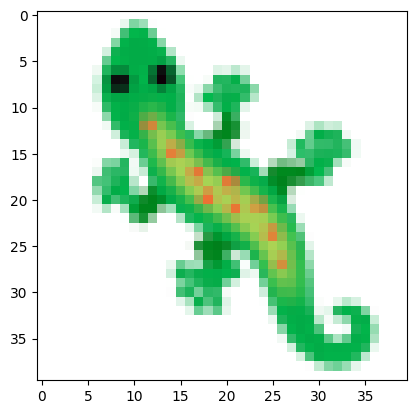

In [5]:
img_tensor = load_image(path)

# Create a starting seed

Create a grid of shape `1, 16, H, W` initialized with zeros, where all elements are set to 0.

Place a single cell in the center of the grid. This central cell should have all channels (except for RGB) set to 1.
The RGB channels of the seed cell are intentionally set to zero to ensure visibility on the white background.

In [30]:
# | export
seed = torch.zeros(1, 16, TARGET_SIZE, TARGET_SIZE).to(def_device)

seed_vectors = torch.rand([4, 16])
seed_vectors = torch.nn.functional.normalize(seed_vectors, dim=-1)

for dr in range(0, 2):
    for dc in range(0, 2):
        seed[:, 3:, TARGET_SIZE // 2 + dr, TARGET_SIZE // 2 + dc] = seed_vectors[
            dc + 2 * dr, 3:
        ]

In [24]:
seed.shape

torch.Size([1, 16, 40, 40])

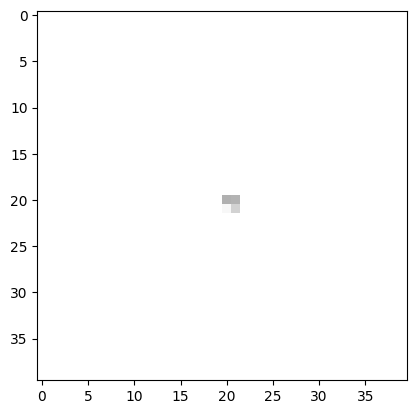

In [31]:
plt.imshow(seed[0, :4].detach().cpu().permute(1, 2, 0))
plt.show()

# Training Loop

In [9]:
#|eval: false


# training hyperparameters 
n_epochs = 200
batch_size = 8

lr = 2e-3
lr_gamma = 0.9999
betas = (0.5, 0.5)

In [10]:
#|eval: false

# initialize the model
ca = CAModel(CHANNEL_N).to(def_device)

In [11]:
#|eval: false


# optimization
import torch.optim as optim

optimizer = torch.optim.Adam(ca.parameters(), lr=lr, betas=betas)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer, lr_gamma)

In [33]:
#|eval: false


# create the input to the network and the target
model_in = seed.repeat(batch_size, 1, 1, 1)
target = img_tensor.repeat(batch_size, 1, 1, 1)

In [35]:
#|eval: false


for i in tqdm(range(n_epochs)):
    optimizer.zero_grad()
    steps = torch.randint(64, 96, (1,)).item()
    res = ca(model_in, steps=steps)

    loss = F.mse_loss(res[:, :4], target) # we only care about the RGBA channels
    if i%(n_epochs // 10) == 0:
        print(f"Epoch: {i} Loss: {loss.item()}")
    loss.backward()
    optimizer.step()
    scheduler.step()

  0%|          | 0/200 [00:00<?, ?it/s]

Epoch: 0 Loss: 0.04260491207242012


  6%|▌         | 12/200 [00:21<05:26,  1.74s/it]

Epoch: 12 Loss: 0.030000653117895126


 12%|█▏        | 24/200 [00:41<04:59,  1.70s/it]

Epoch: 24 Loss: 0.020487340167164803


 18%|█▊        | 36/200 [01:02<04:39,  1.70s/it]

Epoch: 36 Loss: 0.02076731249690056


 24%|██▍       | 48/200 [01:22<04:21,  1.72s/it]

Epoch: 48 Loss: 0.024550599977374077


 30%|███       | 60/200 [01:43<04:05,  1.75s/it]

Epoch: 60 Loss: 0.017348909750580788


 36%|███▌      | 72/200 [02:04<03:39,  1.72s/it]

Epoch: 72 Loss: 0.02245294116437435


 42%|████▏     | 84/200 [02:24<03:04,  1.59s/it]

Epoch: 84 Loss: 0.016987504437565804


 48%|████▊     | 96/200 [02:43<02:47,  1.61s/it]

Epoch: 96 Loss: 0.018856560811400414


 54%|█████▍    | 108/200 [03:02<02:18,  1.50s/it]

Epoch: 108 Loss: 0.014805188402533531


 60%|██████    | 120/200 [03:22<02:21,  1.77s/it]

Epoch: 120 Loss: 0.014632973819971085


 66%|██████▌   | 132/200 [03:42<02:06,  1.86s/it]

Epoch: 132 Loss: 0.01641937345266342


 72%|███████▏  | 144/200 [04:05<01:37,  1.74s/it]

Epoch: 144 Loss: 0.017868367955088615


 78%|███████▊  | 156/200 [04:26<01:12,  1.65s/it]

Epoch: 156 Loss: 0.015270602889358997


 84%|████████▍ | 168/200 [04:47<00:58,  1.82s/it]

Epoch: 168 Loss: 0.020874761044979095


 90%|█████████ | 180/200 [05:10<00:44,  2.20s/it]

Epoch: 180 Loss: 0.012984230183064938


 96%|█████████▌| 192/200 [05:30<00:12,  1.62s/it]

Epoch: 192 Loss: 0.019402986392378807


100%|██████████| 200/200 [05:44<00:00,  1.72s/it]


Test the training process of the network by generating and displaying an animation.

In [36]:
#|eval: false


images = ca.grow_animation(seed, 200)
display_animation(images)

As expected, after some time the automato is startig to lose the desired shape.
